Found 49343 images belonging to 36 classes.
Found 18506 images belonging to 36 classes.
Epoch 1/10
1541/1541 [==============================] - 579s 375ms/step - loss: 2.5842 - accuracy: 0.1938 - val_loss: 1.1829 - val_accuracy: 0.6920
Epoch 2/10
1541/1541 [==============================] - 582s 378ms/step - loss: 1.3751 - accuracy: 0.5076 - val_loss: 0.7491 - val_accuracy: 0.7810
Epoch 3/10
1541/1541 [==============================] - 577s 374ms/step - loss: 0.9909 - accuracy: 0.6420 - val_loss: 0.4496 - val_accuracy: 0.8372
Epoch 4/10
1541/1541 [==============================] - 579s 376ms/step - loss: 0.8077 - accuracy: 0.7075 - val_loss: 0.2540 - val_accuracy: 0.9448
Epoch 5/10
1541/1541 [==============================] - 579s 376ms/step - loss: 0.6696 - accuracy: 0.7587 - val_loss: 0.2625 - val_accuracy: 0.9133
Epoch 6/10
1541/1541 [==============================] - 585s 379ms/step - loss: 0.5731 - accuracy: 0.7939 - val_loss: 0.1708 - val_accuracy: 0.9317
Epoch 7/10
1541/1541 [==

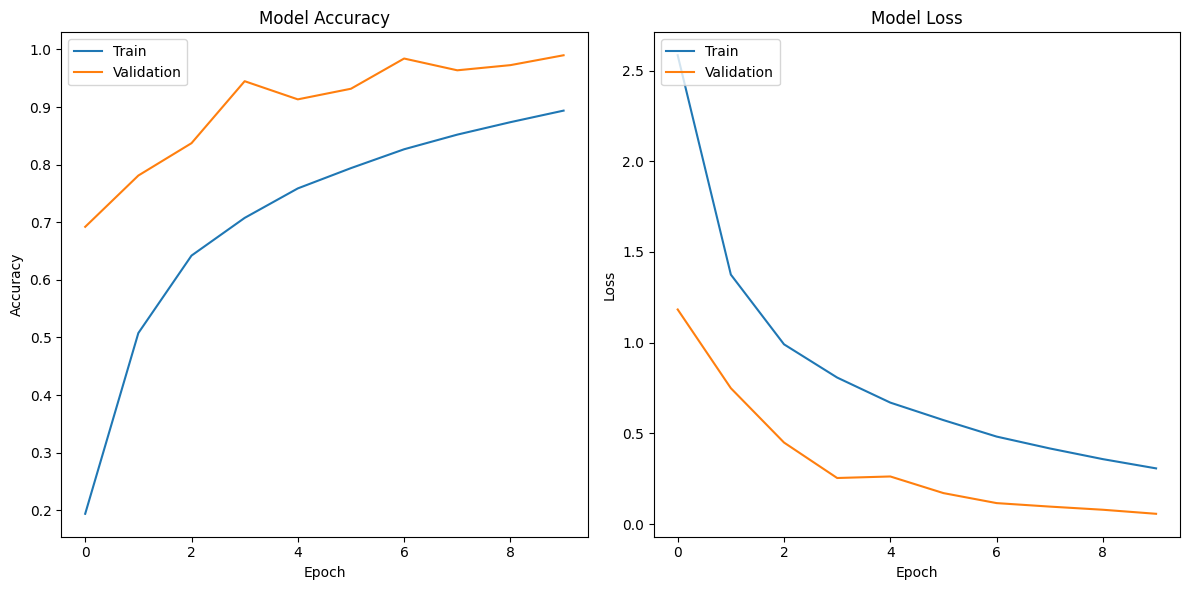

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [1]:
import os
import numpy as np
import random
import shutil
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import scipy


# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Define directories and parameters
source_dir = 'processed_data'
train_dir = 'train'
val_dir = 'val'
img_size = (224, 224)  # Change the input shape to (224, 224)
batch_size = 32

# Function to split data into train and val directories
def split_data(source, train, val, split_size):
    files = os.listdir(source)
    random.shuffle(files)
    split_index = int(split_size * len(files))
    train_files = files[:split_index]
    val_files = files[split_index:]

    for file in train_files:
        shutil.copy(os.path.join(source, file), os.path.join(train, file))

    for file in val_files:
        shutil.copy(os.path.join(source, file), os.path.join(val, file))

# Create train and val directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

for label in os.listdir(source_dir):
    os.makedirs(os.path.join(train_dir, label), exist_ok=True)
    os.makedirs(os.path.join(val_dir, label), exist_ok=True)
    split_data(os.path.join(source_dir, label), os.path.join(train_dir, label), os.path.join(val_dir, label),
               split_size=0.8)

# Create data generators
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Define the number of output classes
n_classes = len(os.listdir(train_dir))

# Define your custom CNN architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and collect history for learning curves
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

# Plot learning curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

# Save the trained model
model.save('try.keras')

# Display model summary
model.summary()

# Evaluate the model on the validation data and get confidence
val_loss, val_accuracy = model.evaluate(val_generator)
print(f'Validation Loss: {val_loss:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')
print('finished')

Found 49343 images belonging to 36 classes.
Found 18506 images belonging to 36 classes.
Epoch 1/50
1541/1541 [==============================] - 580s 376ms/step - loss: 2.5842 - accuracy: 0.1938 - val_loss: 1.1829 - val_accuracy: 0.6920
Epoch 2/50
1541/1541 [==============================] - 578s 375ms/step - loss: 1.3751 - accuracy: 0.5076 - val_loss: 0.7491 - val_accuracy: 0.7810
Epoch 3/50
1541/1541 [==============================] - 577s 374ms/step - loss: 0.9909 - accuracy: 0.6420 - val_loss: 0.4496 - val_accuracy: 0.8372
Epoch 4/50
1541/1541 [==============================] - 578s 375ms/step - loss: 0.8077 - accuracy: 0.7075 - val_loss: 0.2540 - val_accuracy: 0.9448
Epoch 5/50
1541/1541 [==============================] - 576s 374ms/step - loss: 0.6696 - accuracy: 0.7587 - val_loss: 0.2625 - val_accuracy: 0.9133
Epoch 6/50
1541/1541 [==============================] - 592s 384ms/step - loss: 0.5731 - accuracy: 0.7939 - val_loss: 0.1708 - val_accuracy: 0.9317
Epoch 7/50
1541/1541 [==

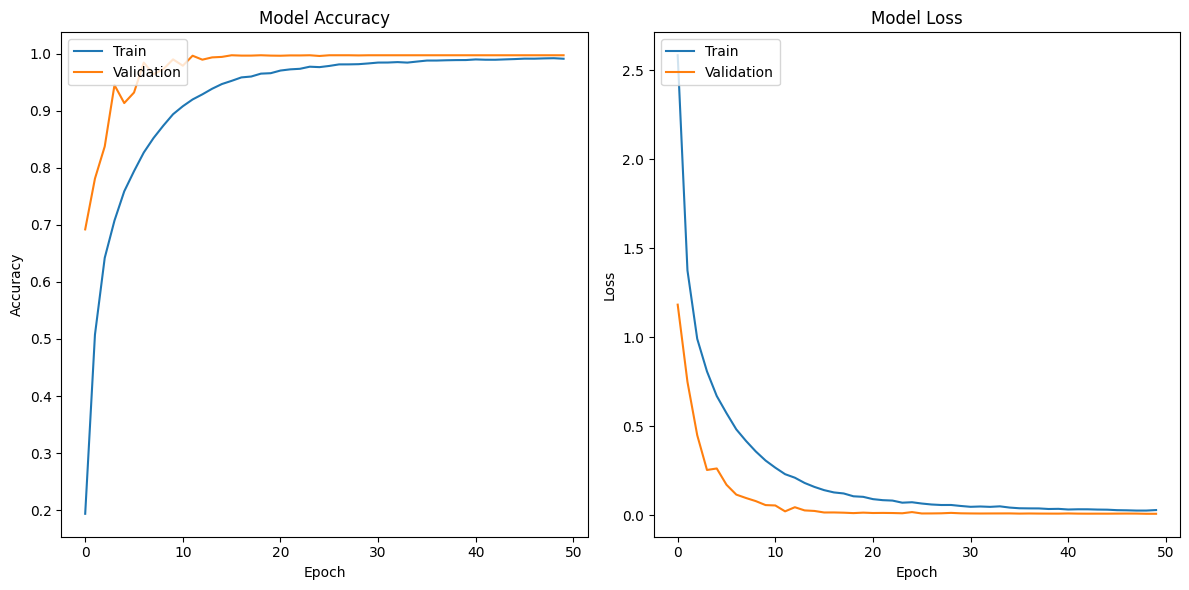

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


579/579 [==============================] - 55s 96ms/step - loss: 0.0078 - accuracy: 0.9970
Validation Loss: 0.0078
Validation Accuracy: 0.9970
finished


In [1]:
import os
import numpy as np
import random
import shutil
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import scipy

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Define directories and parameters
source_dir = 'processed_data'
train_dir = 'train'
val_dir = 'val'
img_size = (224, 224)  # Change the input shape to (224, 224)
batch_size = 32

# Function to split data into train and val directories
def split_data(source, train, val, split_size):
    files = os.listdir(source)
    random.shuffle(files)
    split_index = int(split_size * len(files))
    train_files = files[:split_index]
    val_files = files[split_index:]

    for file in train_files:
        shutil.copy(os.path.join(source, file), os.path.join(train, file))

    for file in val_files:
        shutil.copy(os.path.join(source, file), os.path.join(val, file))

# Create train and val directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

for label in os.listdir(source_dir):
    os.makedirs(os.path.join(train_dir, label), exist_ok=True)
    os.makedirs(os.path.join(val_dir, label), exist_ok=True)
    split_data(os.path.join(source_dir, label), os.path.join(train_dir, label), os.path.join(val_dir, label),
               split_size=0.8)

# Create data generators
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Define the number of output classes
n_classes = len(os.listdir(train_dir))

# Define your custom CNN architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(36, activation='softmax'))  # Modify the output layer to match the number of classes in your dataset

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and collect history for learning curves
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=50,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

# Plot learning curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

# Save the trained model
model.save('main_model.h5')

# Display model summary
model.summary()

# Evaluate the model on the validation data and get confidence
val_loss, val_accuracy = model.evaluate(val_generator)
print(f'Validation Loss: {val_loss:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')
print('finished')


In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Load the trained model
model = tf.keras.models.load_model('main_model.h5')

# Define a list of symbols for labeling the classes
symbols = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
           'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
           'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

# Function to predict sign from an image file
def predict_sign(image_path):
    try:
        # Get the current working directory
        current_dir = os.getcwd()

        # Build the full path to the image
        image_path = os.path.join(current_dir, image_path)

        # Load and preprocess the image
        img = load_img(image_path, target_size=(224, 224))
        img = img_to_array(img)
        img = preprocess_input(img)
        img = np.expand_dims(img, axis=0)

        # Make predictions
        predictions = model.predict(img)
        predicted_class = np.argmax(predictions)
        predicted_sign = symbols[predicted_class]

        return predicted_sign
    except Exception as e:
        print("Error predicting sign:", str(e))
        return None

# Example usage:
image_path = '1.jpg'  # Replace with the name of your image file in the same directory
predicted_sign = predict_sign(image_path)
if predicted_sign:
    print(f"Predicted Sign: {predicted_sign}")
else:
    print("Prediction failed.")


1/1 [==============================] - 0s 39ms/step
Predicted Sign: H
